# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [9]:
# Enter your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

The dependent variable is 'class'.


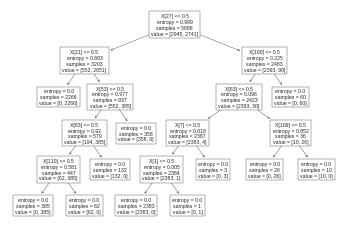

In [41]:
# Enter your code here
# A. Read the dataset, explore it and determine what is the dependent variable
data = pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns', None)
frame = pd.DataFrame(data)
#print(frame.head())
#print(frame.shape)
#print(frame.describe())
print("The dependent variable is 'class'.")

# B. Store the feature and target variable.
X = frame.iloc[:, 1:]
y = frame.iloc[:, 0]

# C. Convert all categorical variables into dummy variables (1 mark)
# frame1 = pd.get_dummies(frame)
# frame1 = frame1.astype(float)
# X = frame1.iloc[:, 1:]
# y = frame1.iloc[:, 0]
y = pd.get_dummies(y,drop_first=True)
X = pd.get_dummies(X)

# D. Partition the data into training and test sets (70/30) (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

# E. Fit the training data to a classification tree. (3 marks)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
from sklearn import tree
plt.figure(2)
dtTree = tree.plot_tree(dt)
plt.show()

# or
#dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020)
#dt.fit(X_train,y_train)
#ypred = dt.predict((X_test))
#plt.show()
#fn = X.columns
#plt.figure(figsize=(12,12))
#classList = list(map(str,dt.classes_.tolist()))
#a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
#plt.show()

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


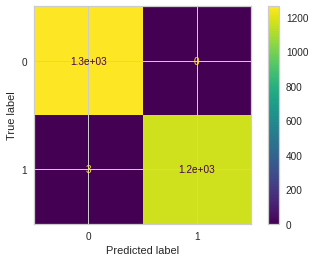

In [42]:
# Enter your code here
from sklearn import metrics
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [43]:
# Enter your code here
from sklearn.metrics import accuracy_score
training_pred = dt.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, training_pred))

Accuracy:  1.0


4. Print the accuracy on the test partition? (2 marks)


In [44]:
# Enter your code here
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


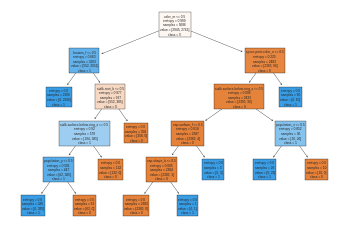

In [45]:
# Enter your code here
frame1 = pd.get_dummies(frame)
frame1 = frame1.astype(str)
X = frame1.iloc[:, 1:]
y = frame1.iloc[:, 0]
from sklearn import tree
plt.figure(2)
fn = X.columns
cn = y.unique()
frame = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('mushroom.png')
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [46]:
# Enter your code here
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
imp.sort_values(by=1, ascending=False)
print(imp.head(3))

             0         1
0  cap-shape_b  0.000000
1  cap-shape_c  0.002229
2  cap-shape_f  0.000000


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [47]:
def output_result(result):
  output = {}
  for value in X_train.columns:
    if value in enter:
      output[value] = [0]
    else:
      output[value] = [1]
  return pd.DataFrame(output)

In [48]:
# Enter your code here
#data[((data["cap-shape"] == "x") & (data["cap-surface"] == "s") & (data["cap-color"] == "n") & (data["bruises"] == "t") & (data["gill-attachment"] == "f") & (data["gill-spacing"] == "c") & (data["gill-size"] == "n") & (data["gill-color"] == "k") & (data["stalk-shape"] == "e") & (data["stalk-root"] == "e") & (data["stalk-surface-above-ring"] == "s") & (data["stalk-surface-below-ring"] == "s") & (data["stalk-color-above-ring"] == "w") & (data["stalk-color-below-ring"] == "w")  & (data["veil-type"] == "p") & (data["veil-color"] == "w") & (data["ring-number"] == "o") & (data["ring-type"] == "p") & (data["population"] == "s") & (data["habitat"] == "u") & (data["spore-print-color"] == "k") & (data["odor"] == "p"))]
enter =  ['cap-shape_x', 'cap-surface_s', 'cap-color_n', 'bruises_t', 'odor_y', 'gill-attachment_f', 'gill-spacing_c', 'gill-size_n', 'gill-color_k', 'stalk-shape_e', 'stalk-root_e', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_s', 'stalk-color-above-ring_w', 'stalk-color-below-ring_w', 'veil-type_p', 'veil-color_w', 'ring-number_o', 'ring-type_p', 'spore-print-color_r', 'population_s', 'habitat_u']
result = output_result(enter)
print(dt.predict(result))
if dt.predict(result)[0] == 0:
  print("Poison")
else:
  print('Edible')

[0]
Poison
